In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

encoder = load_model("../Models/encoder_250_dropout_wmse.keras")
print(f"Loaded encoder")
X = np.load("../Data/LPS/lps-lt-150-1500_x.npy",mmap_mode="r")
print(f"Loaded data")

2025-09-19 13:48:59.483233: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-19 13:49:12.243756: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-09-19 13:49:12.289090: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 539992000 exceeds 10% of free system memory.
2025-09-19 13:49:12.387902: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 539992000 exceeds 10% of free system memory.
2025-09-19 13:49:12.466602: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 539992000 exceeds 10% of free system memory.


Loaded encoder
Loaded data


2025-09-19 13:49:16.789761: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 539992000 exceeds 10% of free system memory.


In [2]:
X.shape

(1640, 67499)

In [12]:
from sklearn.preprocessing import StandardScaler

# 1. Encode your data
latent_vectors = encoder.predict(X, verbose=1)



52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


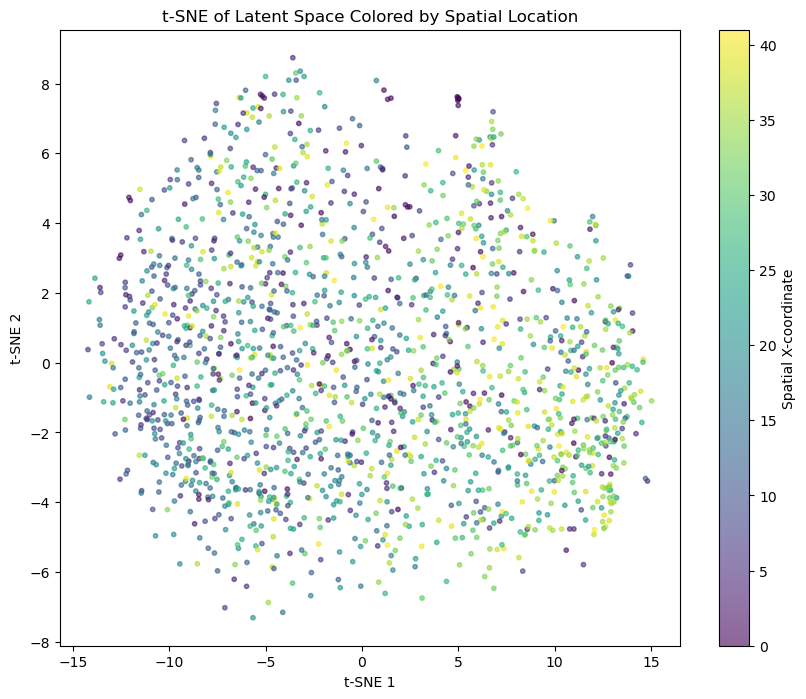

In [23]:
# 2. Subsample if necessary
n_samples = len(X)  # Try increasing sample size if possible
indices = np.random.permutation(latent_vectors.shape[0])[:n_samples]
latent_subset = latent_vectors[indices]

# 3. Scale latent vectors
scaler = StandardScaler()
latent_subset_scaled = scaler.fit_transform(latent_subset)

# 4. Perform t-SNE
tsne = TSNE(n_components=2, perplexity=100, max_iter=2000,random_state=42)
latent_tsne = tsne.fit_transform(latent_subset_scaled)

# 5. Visualize
coords = np.load("../Data/LPS/lps-lt-150-1500_coords.npy", mmap_mode="r")
coords_subset = coords[indices]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1],
                      c=coords_subset[:, 0], alpha=0.6, s=10, cmap='viridis')
plt.colorbar(scatter, label='Spatial X-coordinate')
plt.title('t-SNE of Latent Space Colored by Spatial Location')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()